<a href="https://colab.research.google.com/github/Andru-1987/datasets-fablab-ia/blob/main/fablab_clase1_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Primera clase de FAB LAB
- Intro CSV y GRAPHS

Del siguiente enunciado ir haciendo solo lo que vimos en la clase... el resto lo terminamos la clase que viene:

1. Importar el archivo nba.csv adjunto en un programa de python.
2. Modificar el campo nombre por jugador e imprimir el dataframe.
3. Imprimirle un mensaje al usuario en el que se le pida que indique que desea hacer: Ver todos los jugadores, ver detalle por jugador,  ver el puntaje general o graficar
4. Si desea ver los jugadores, imprimirle solo los nombres de los jugadores.
5. Si desea ver detalle, pedirle el nombre del jugador y mostrarle todos sus datos.
6. Si desea ver el puntaje general, calcular la media de los puntos de los jugadores.
7. Si quiere graficar, mostrarle el gráfico de puntos por jugador en una tamaño de 10x10 color verde con los textos indicativos.

In [ ]:
import pandas       as pd
import matplotlib   as plt
import numpy        as np

In [ ]:
from posixpath import sep
nba_df_url:str = "https://raw.githubusercontent.com/Andru-1987/datasets-fablab-ia/main/data/nba.csv"
nba_df  =   pd.read_csv(nba_df_url,sep=",")

### Primer punto de lectura del csv
- renombrado de la columna

In [ ]:
nba_df.rename(columns={"nombre":"jugador"},inplace=True)

- _Imprimirle un mensaje al usuario en el que se le pida que indique que desea hacer: Ver todos los jugadores, ver detalle por jugador, ver el puntaje general o graficar_

In [ ]:
class PlayersData:
    def __init__(self,**kwargs):
        self.db = kwargs["dataframe"]


    def __all_players(self):
        players = set(self.db.jugador.to_list())
        print("Los jugadores son: \n")
        for player in list(players):
            print(f"* {player.upper()}")
        return None
    def __detail_player(self):
        jugador = input("Ingrese el jugador")
        return self.db[self.db["jugador"] == jugador]

    def __score_total(self):
        return f"Median Score de todo el dataset: {self.db.puntos.median()}"

    def __plot_each_player(self):
        return (self.db
                .groupby(by="jugador")
                .sum()
                .sort_values('puntos')
                .plot(y="puntos",kind="barh",figsize=(10,10),color="green")
                )

    def __default_action(self):
        print("Opcion no entendida")
        return None

    def search_and_action(self):
        options:dict ={
            "ver_jugadores":self.__all_players,
            "detalle_jugador":self.__detail_player,
            "puntaje_general":self.__score_total,
            "graficar":self.__plot_each_player
        }

        input_selection:str = input("""
        Opciones disponibles:
            * ver_jugadores
            * detalle_jugador
            * puntaje_general
            * graficar
        """)

        action = options.get(input_selection,self.__default_action)
        return action()


In [ ]:
players = PlayersData(dataframe=nba_df)


        Opciones disponibles:
            * ver_jugadores
            * detalle_jugador
            * puntaje_general
            * graficar
        graficar


<Axes: ylabel='jugador'>

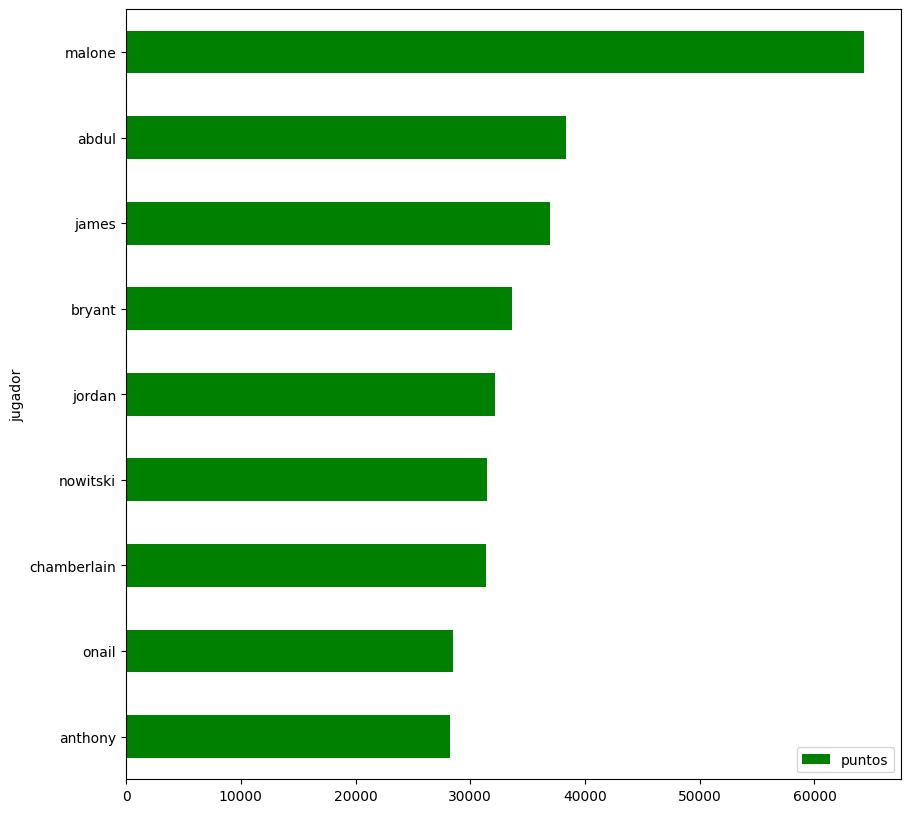

In [ ]:
players.search_and_action()